In [2]:
#from training_no_ddp import * 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from evaluate import *
import os

/data/mikulik/miniconda3/envs/transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-14 20:33:40.769251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Finetune RNA

['rnafinetune_0.15_sgd_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse', 'rnafinetune_0.01_sgd_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse', 'rnafinetune_0.0001_adam_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse', 'rnafinetune_0.0001_sgd_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse', 'rnafinetune_0.001_adam_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse', 'rnafinetune_0.0001_sgd_16_augmentTrue_atacNone_rna37_batch16_logtransformTrue', 'rnafinetune_0.01_sgd_16_augmentTrue_expNone_37_batch16_rna37_logtransformFalse', 'rnafinetune_0.001_sgd_16_augmentTrue_atacNone_rna37_batch16_logtransformFalse']


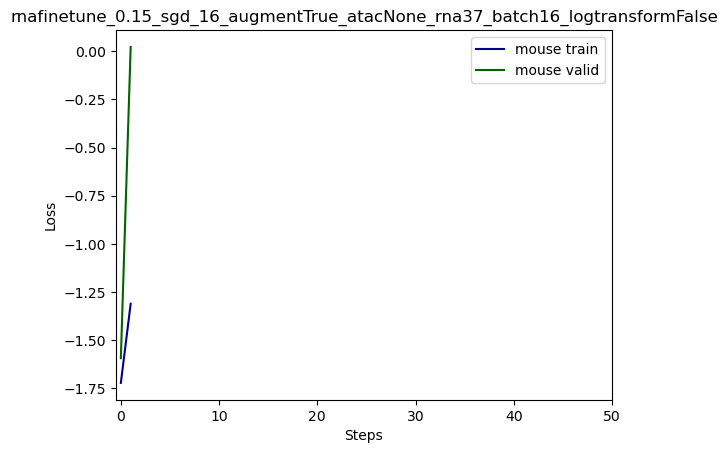

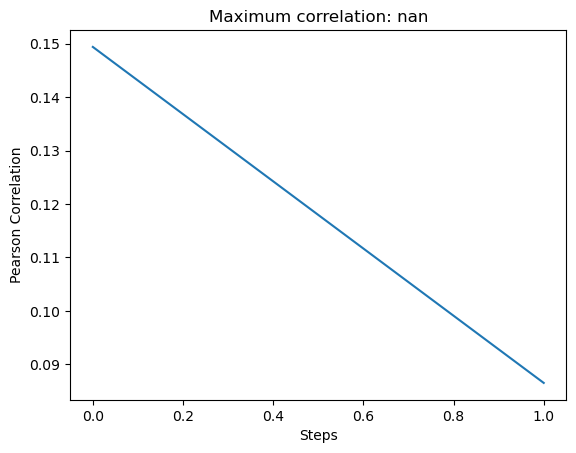

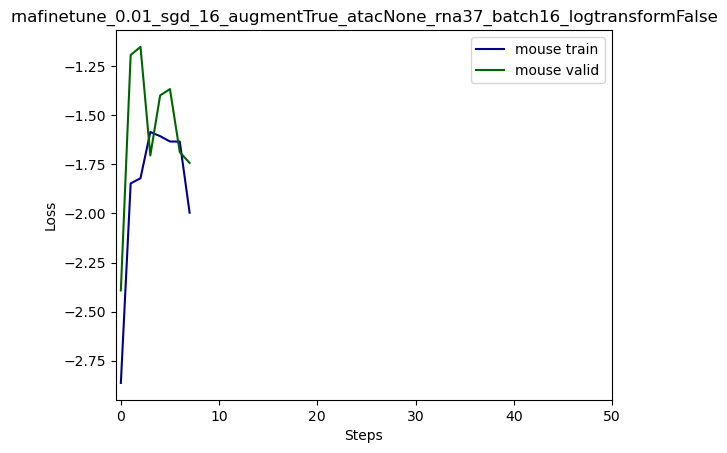

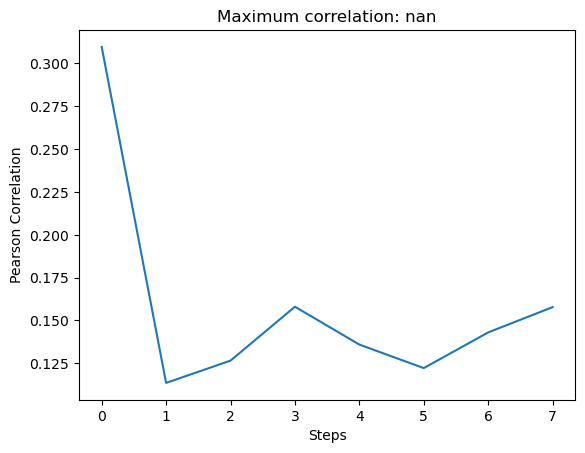

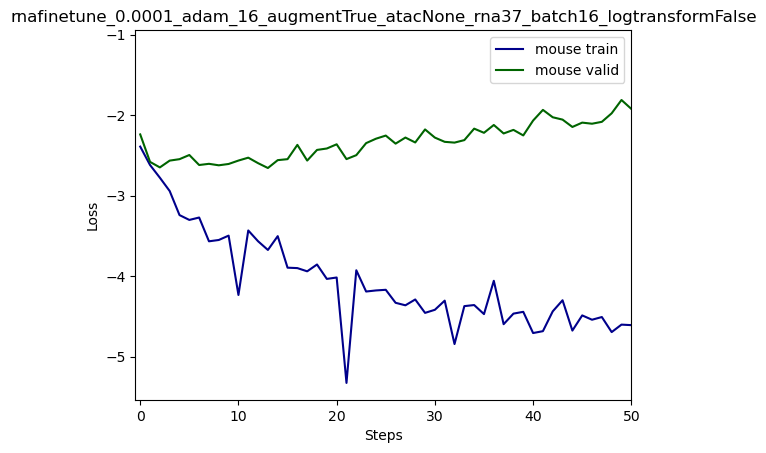

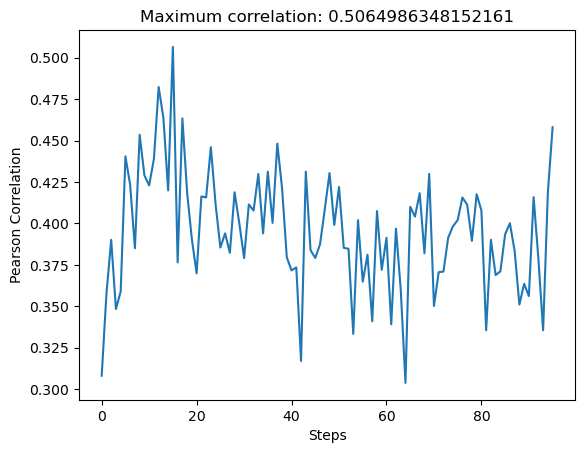

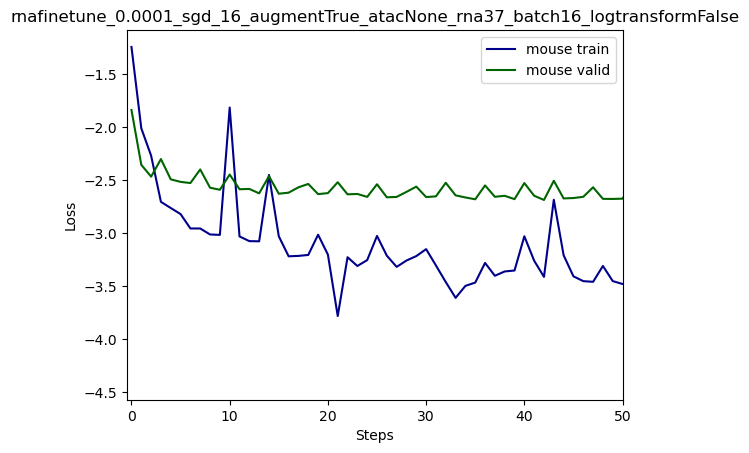

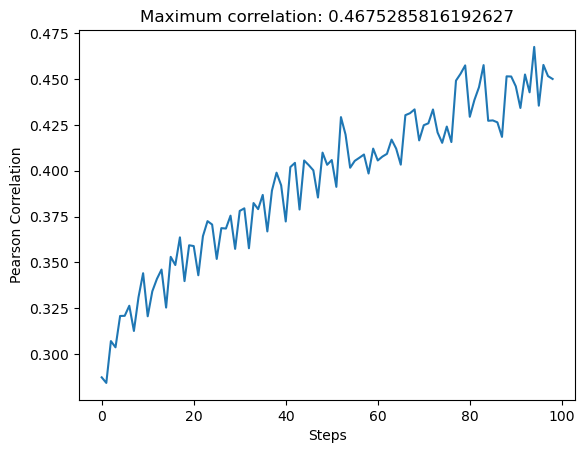

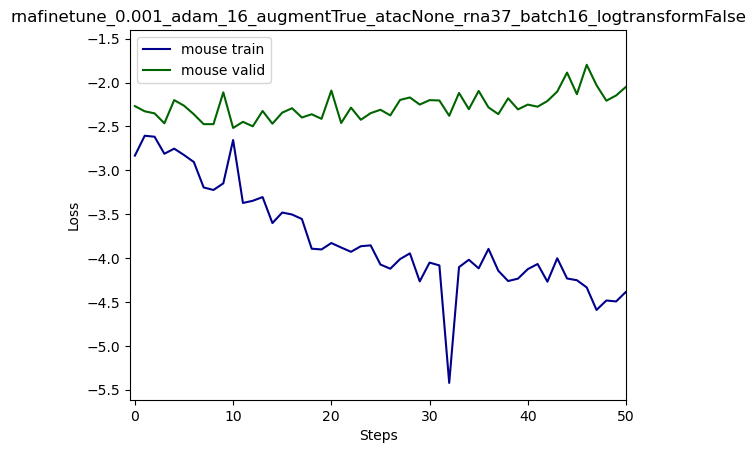

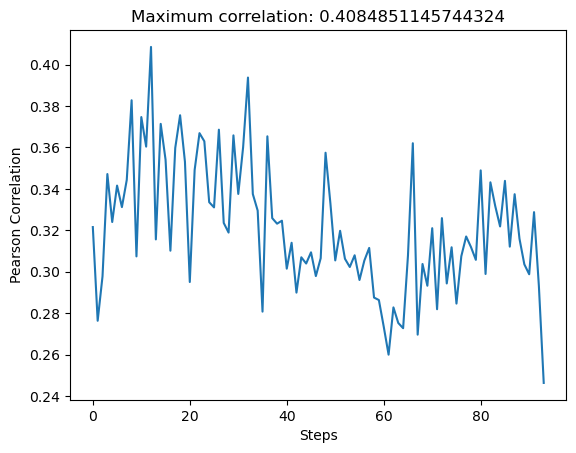

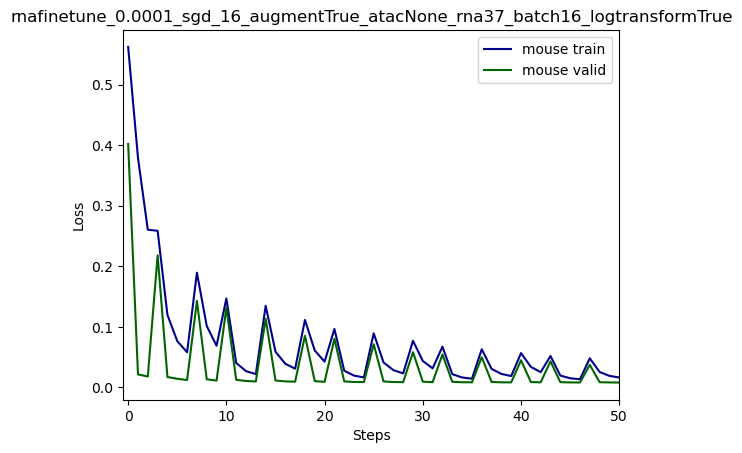

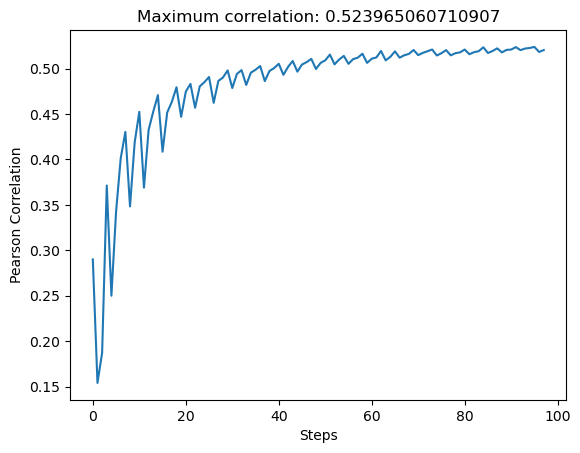

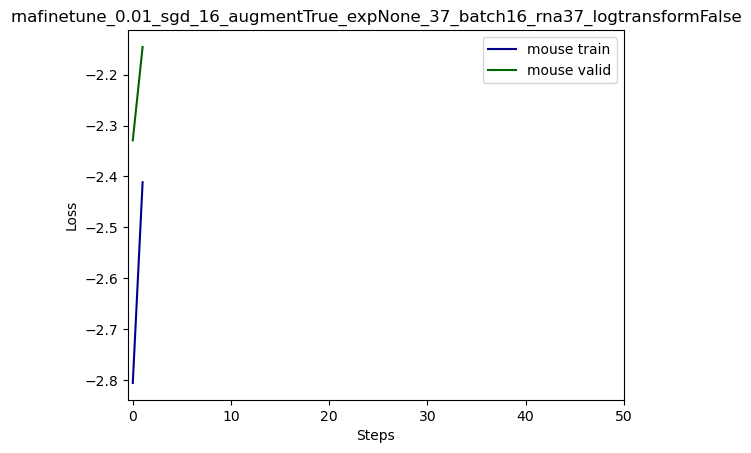

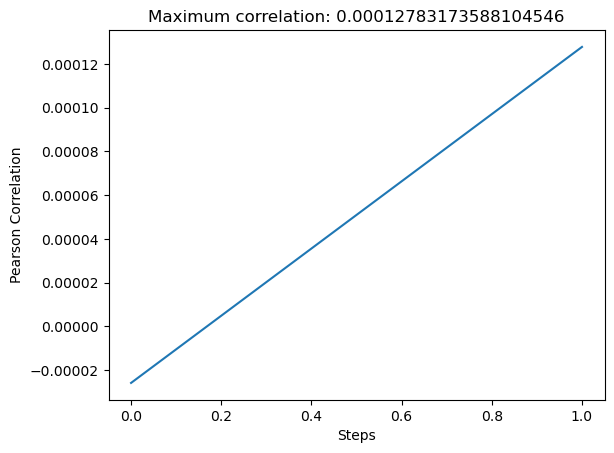

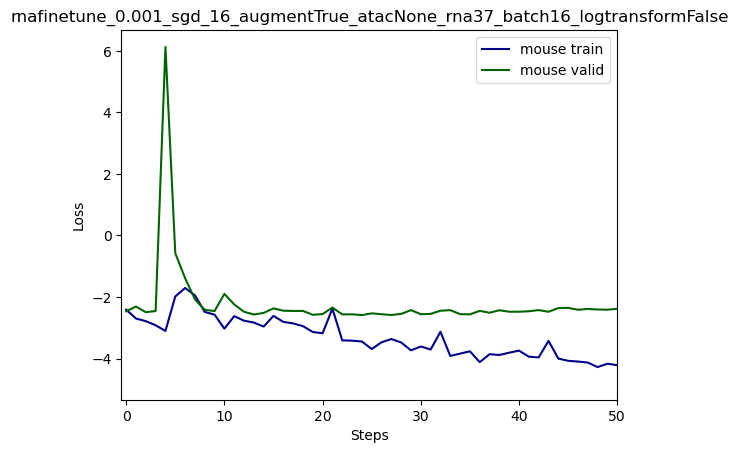

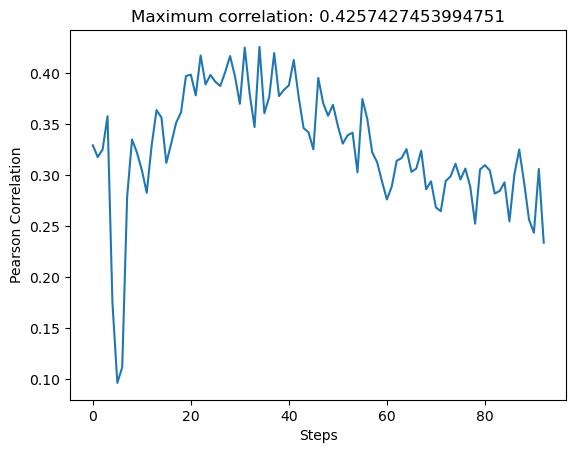

In [8]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/rna/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl") & file.startswith("rnafinetune"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"], xlim=[-0.5,50], save_pdf="/data/mikulik/mnt/gcs_basenj/plots/loss_curves/rna_finetune/")
    plot_correlation_curves(data_dir, name)

### Finetune ATAC

['finetune_test_0.01_sgd_4_augmentFalse', 'finetune_test_0.01_adam_4_augmentFalse', 'finetune_test_0.0001_sgd_4_augmentFalse', 'finetune_test_0.15_sgd_4_augmentFalse', 'finetune_test_0.001_adam_4_augmentFalse', 'finetune_test_0.0001_adam_4_augmentFalse', 'finetune_test_0.001_sgd_4_augmentFalse']


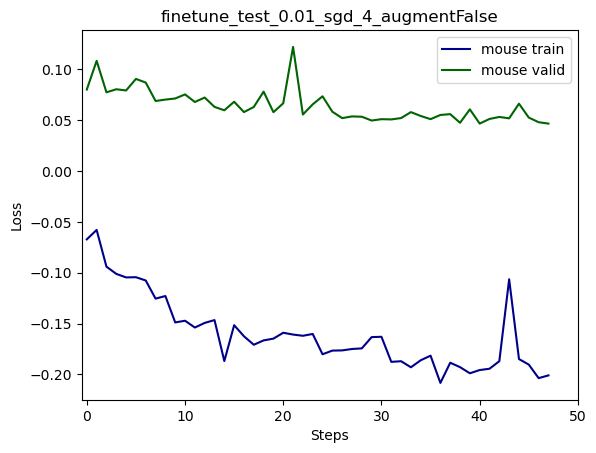

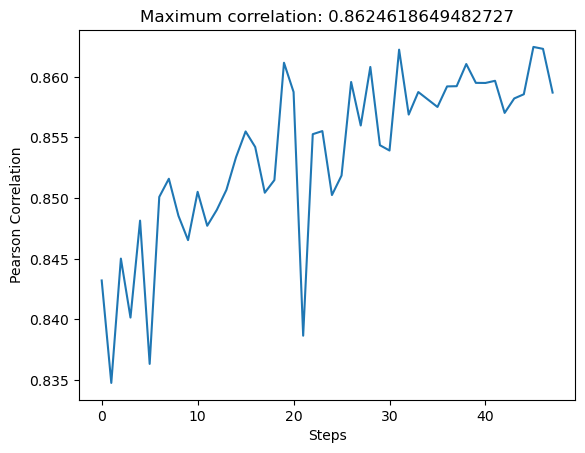

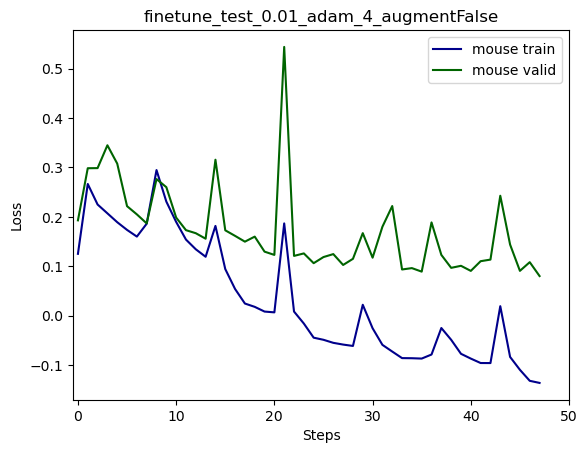

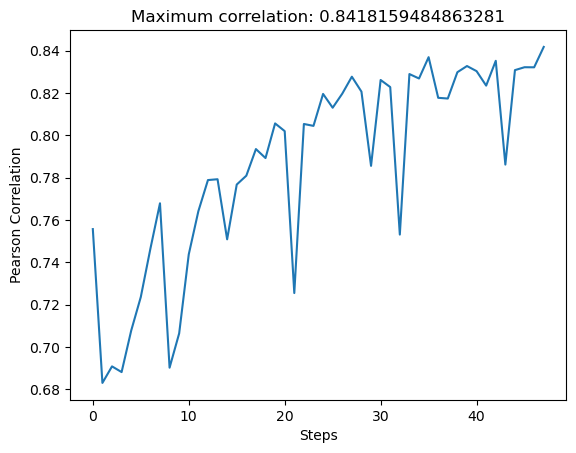

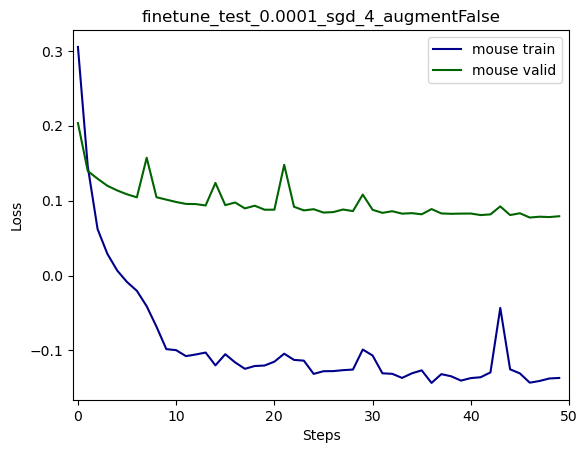

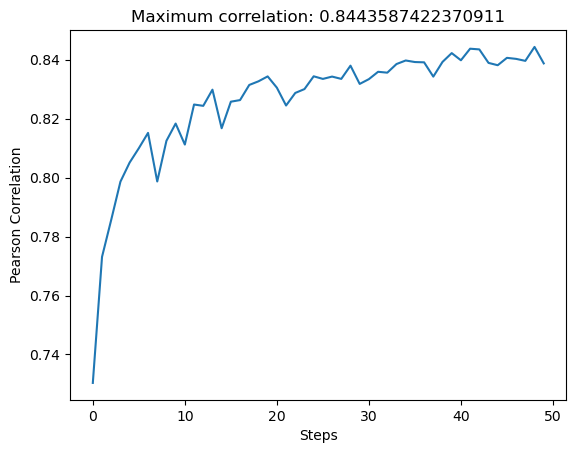

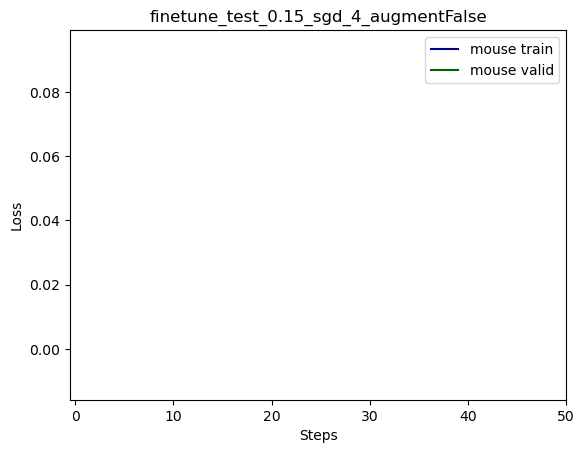

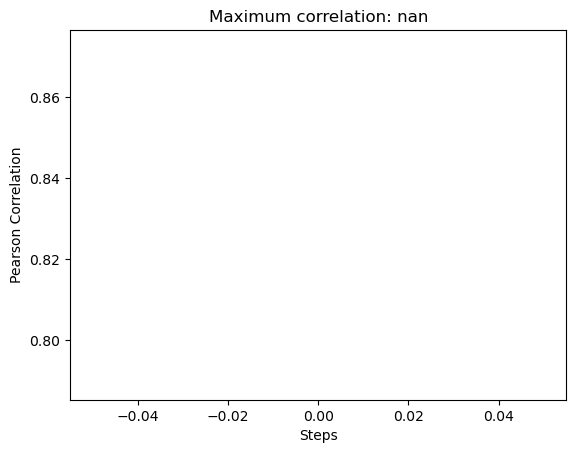

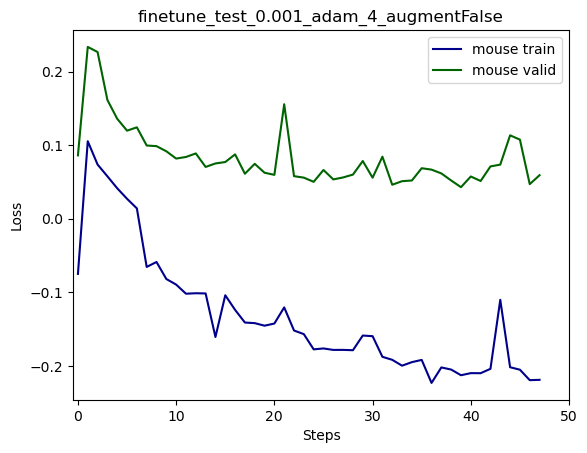

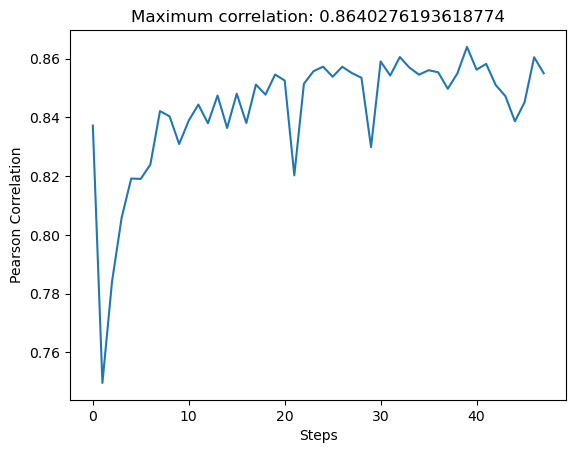

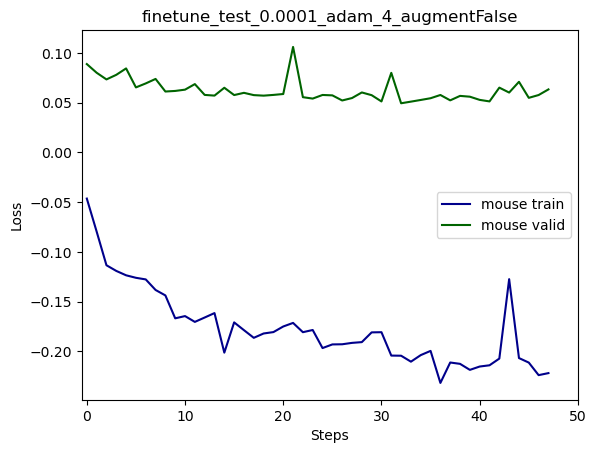

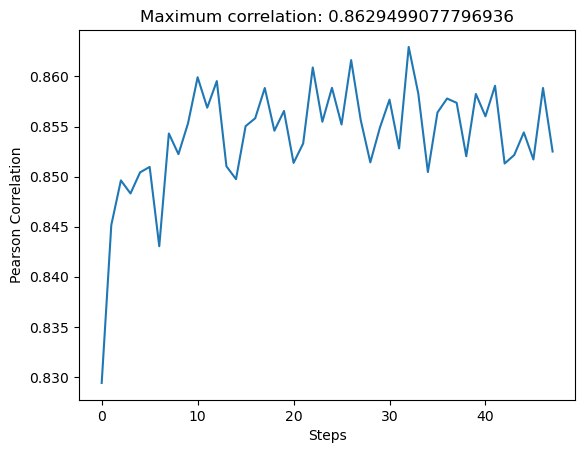

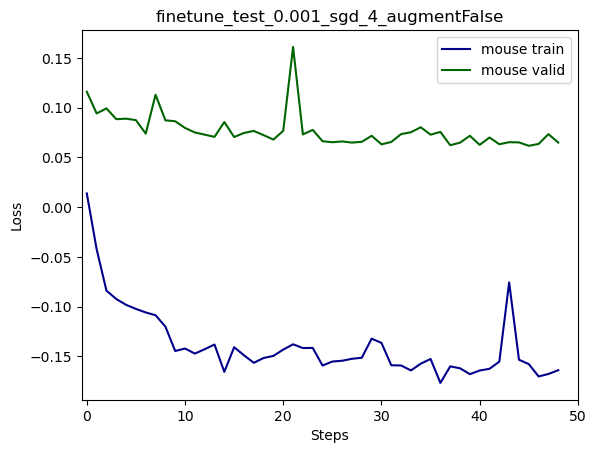

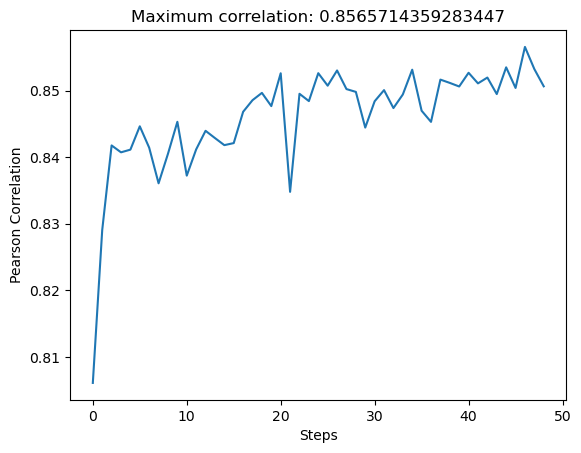

In [3]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl") & file.startswith("finetune_test"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"], xlim=[-0.5,50], save_pdf="/data/mikulik/mnt/gcs_basenj/plots/loss_curves/")
    plot_correlation_curves(data_dir, name)

## Finetune joint

['jointjoint_0.001_sgd_4_augmentTrue_atac35_rna37_batch4_logtransformFalse', 'jointjoint_1e-05_sgd_4_augmentTrue_atac35_rna37_batch4_logtransformFalse_loss_weight20.0', 'jointjoint_0.15_sgd_4_augmentTrue_atac35_rna37_batch4_logtransformFalse_loss_weight0.5', 'jointjoint_0.0001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse', 'jointjoint_0.001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse', 'jointjoint_0.0001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse_loss_weight4.0', 'jointjoint_0.0001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse_loss_weight3.0', 'jointjoint_0.0001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse_loss_weight2.0', 'jointjoint_0.0001_sgd_4_augmentTrue_atac35_rna37_batch4_logtransformFalse', 'jointjoint_0.0001_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse_loss_weight10.0', 'jointjoint_0.01_sgd_16_augmentTrue_atac35_rna37_batch16_logtransformFalse', 'jointjoint_0.15_sgd_4_augmentTrue_atac35_rna37_batch

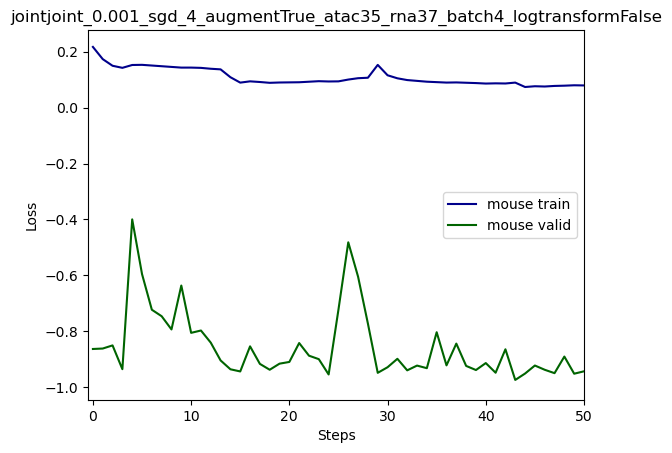

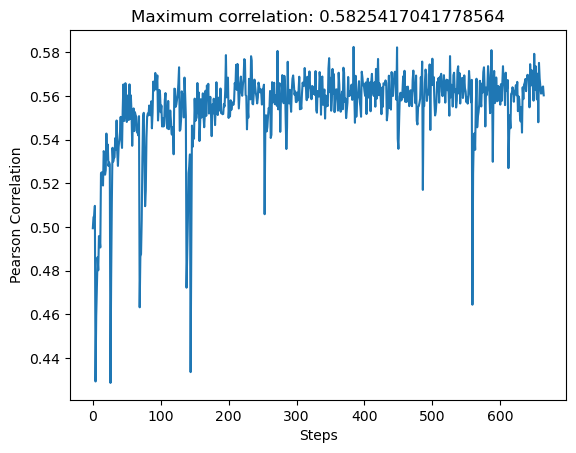

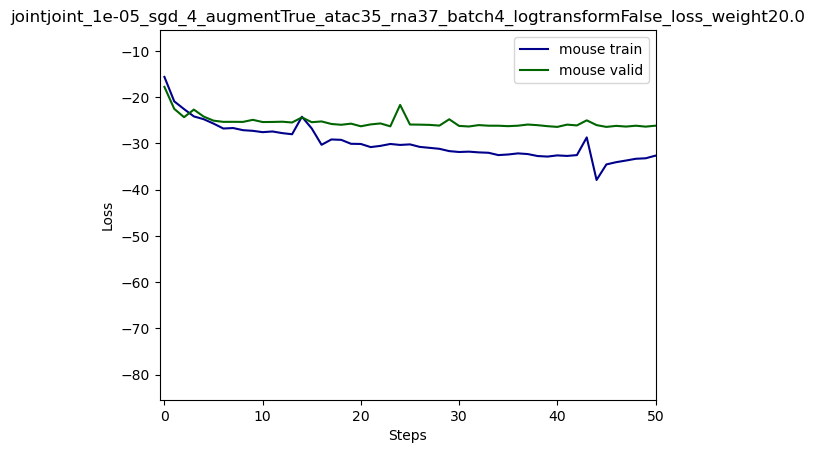

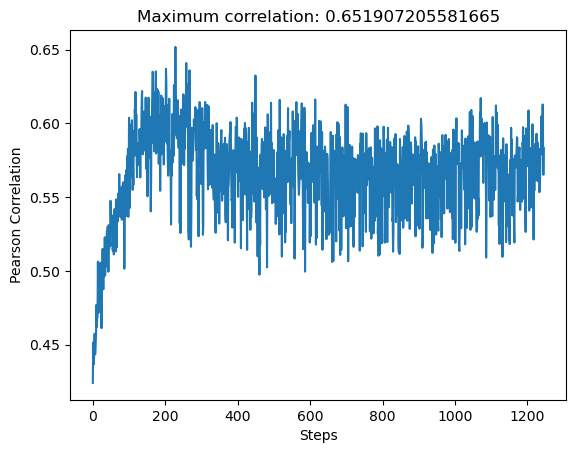

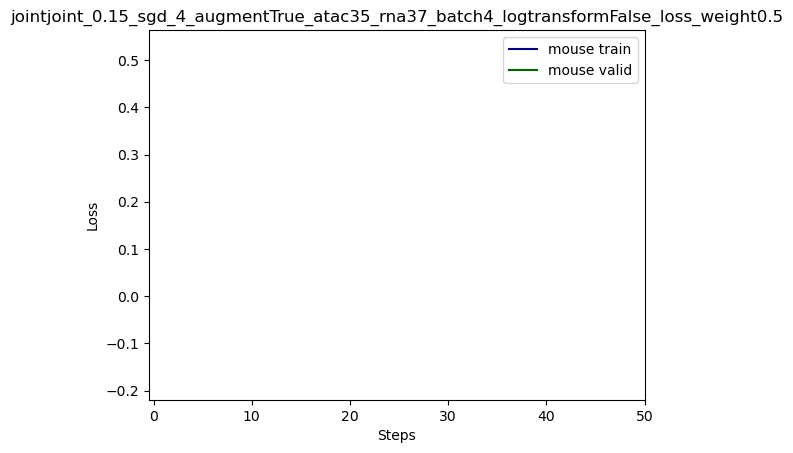

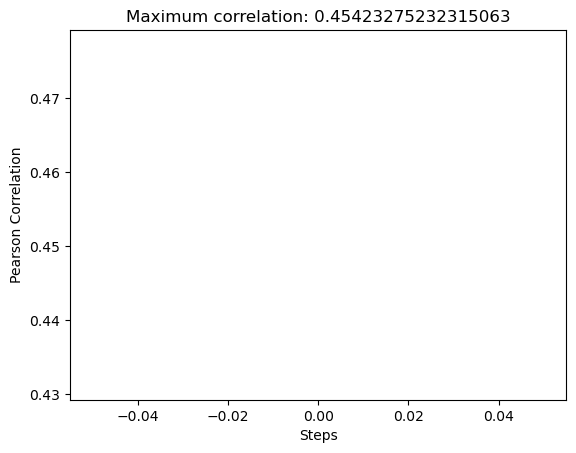

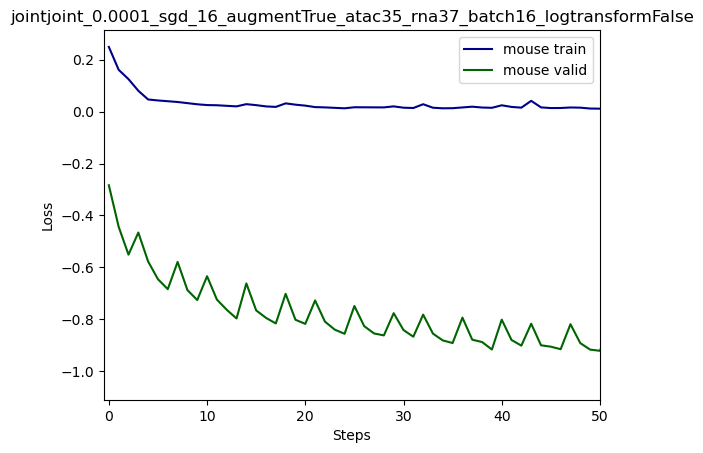

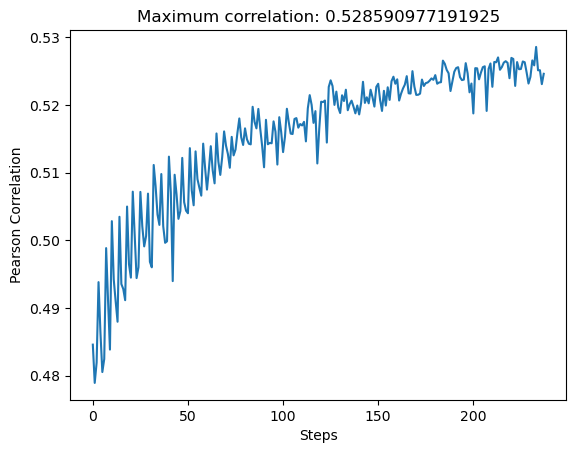

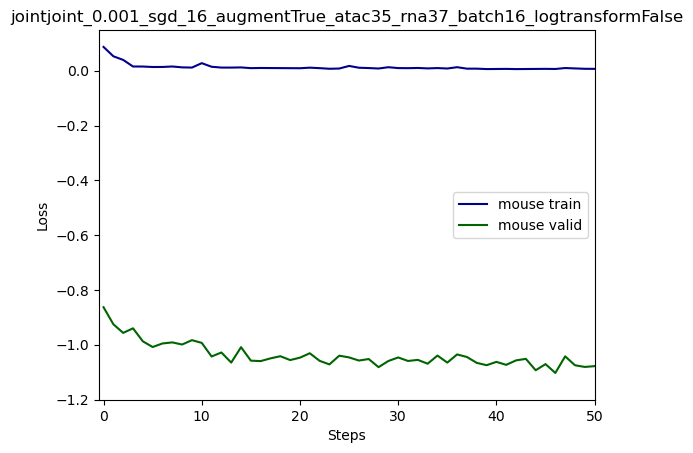

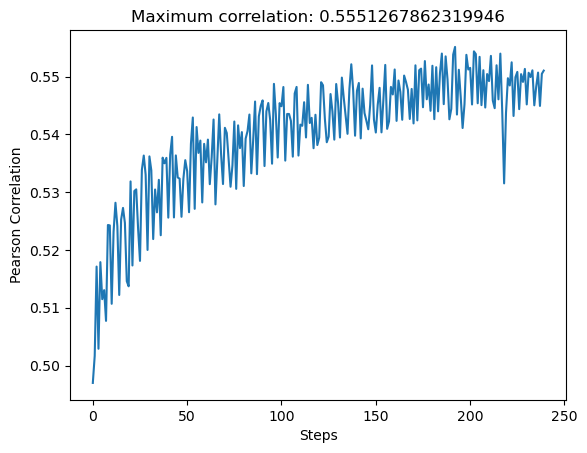

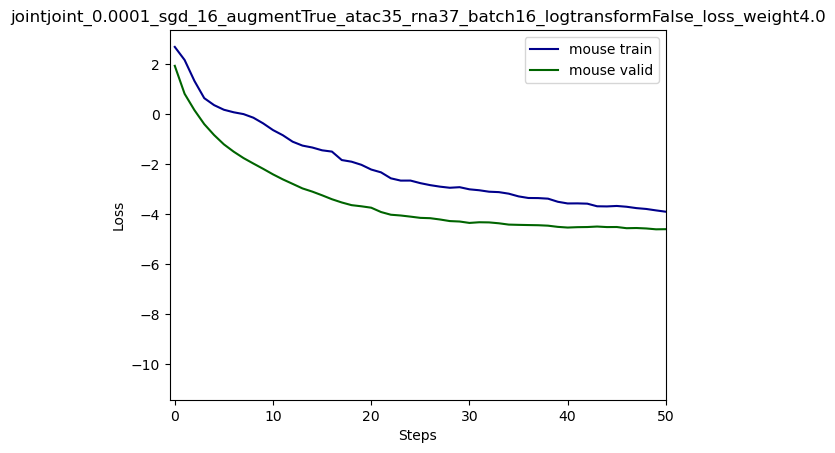

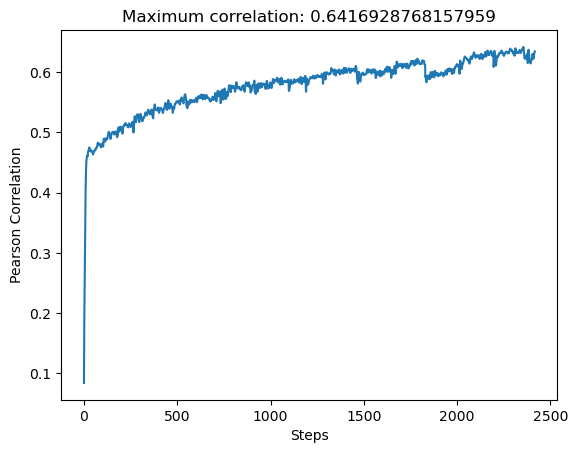

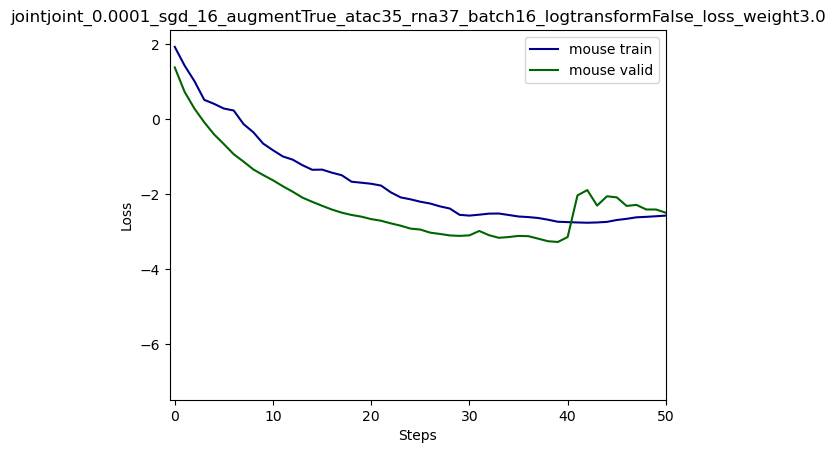

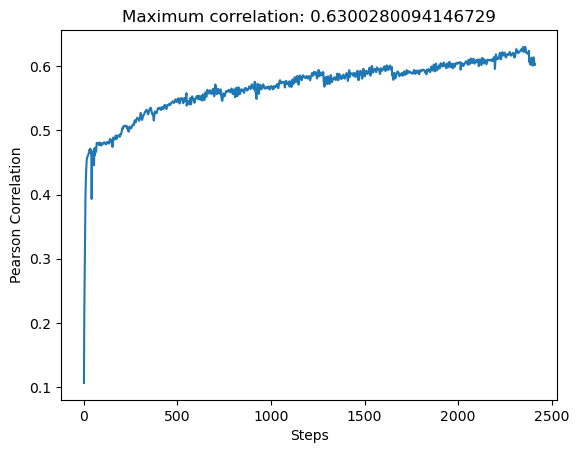

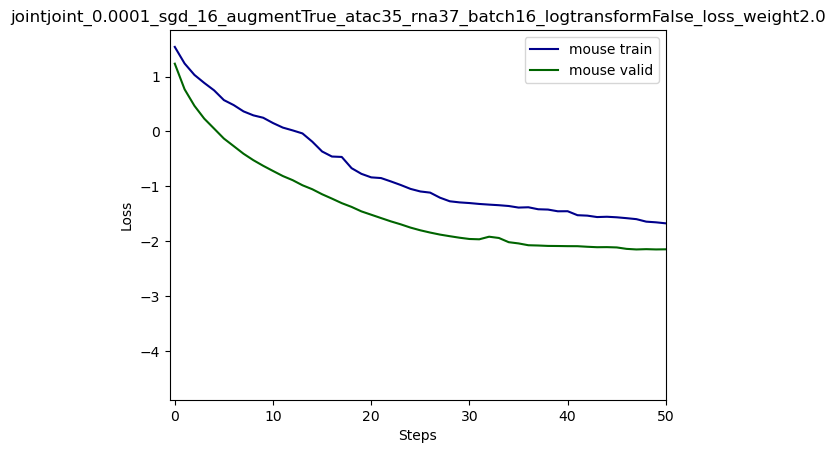

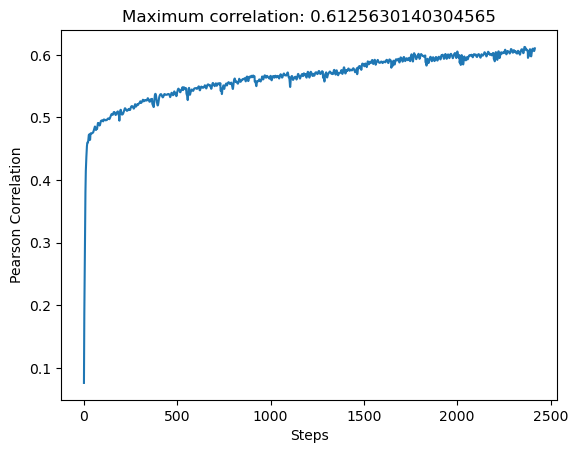

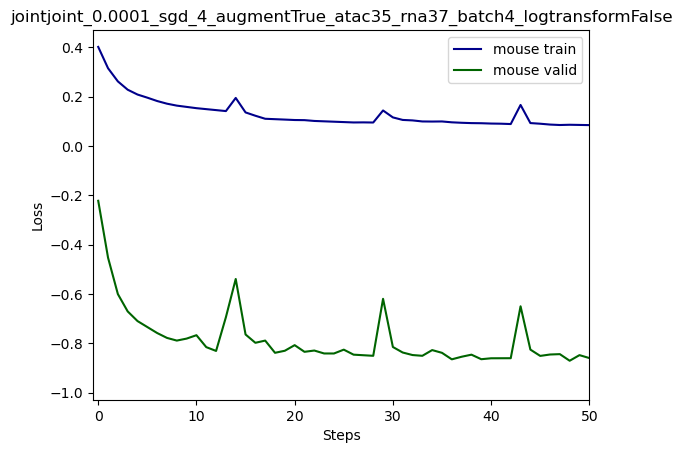

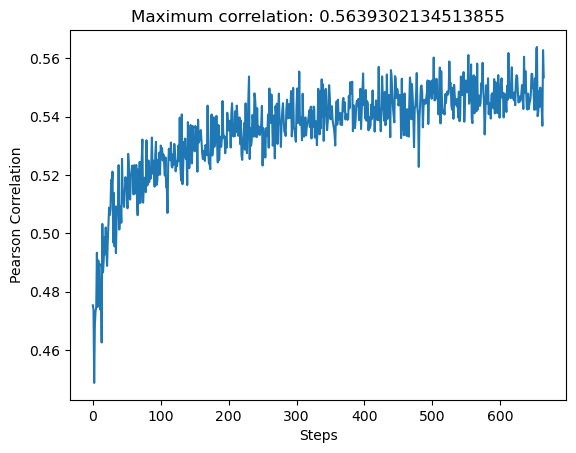

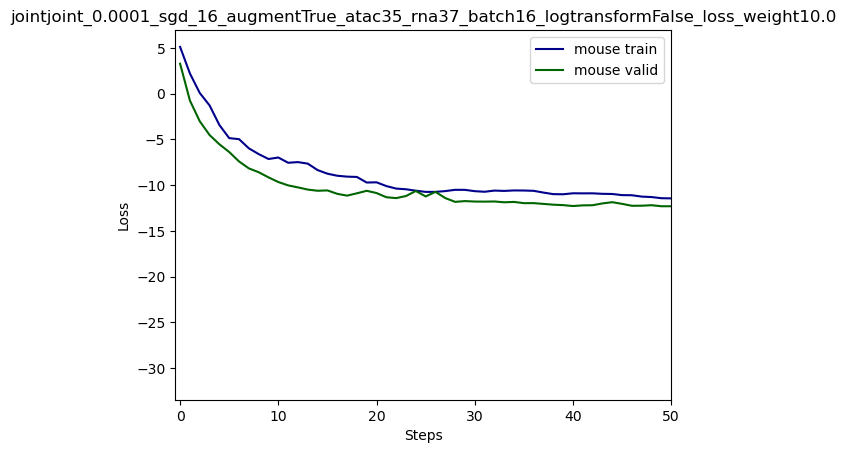

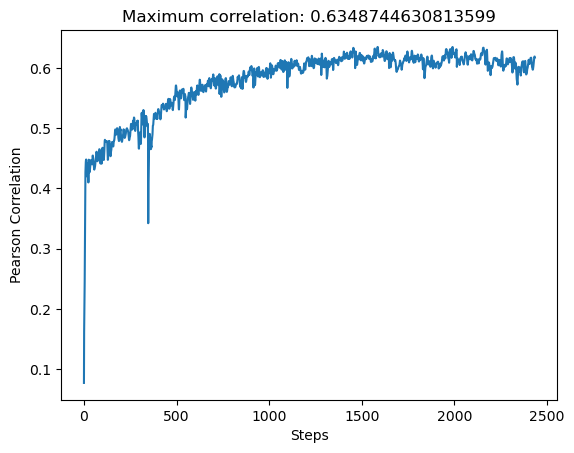

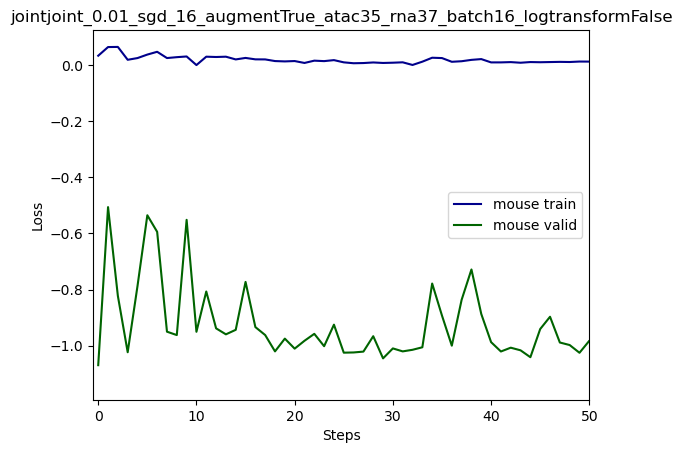

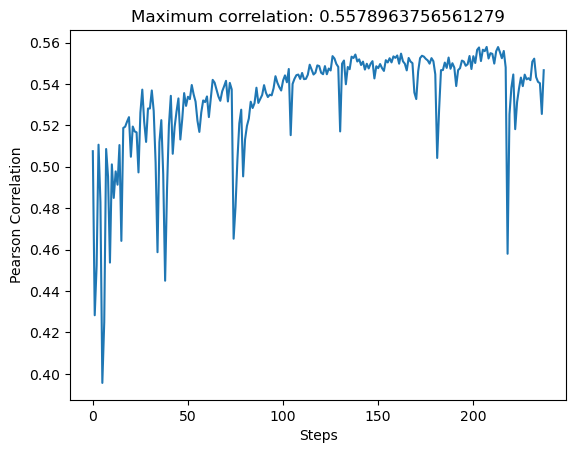

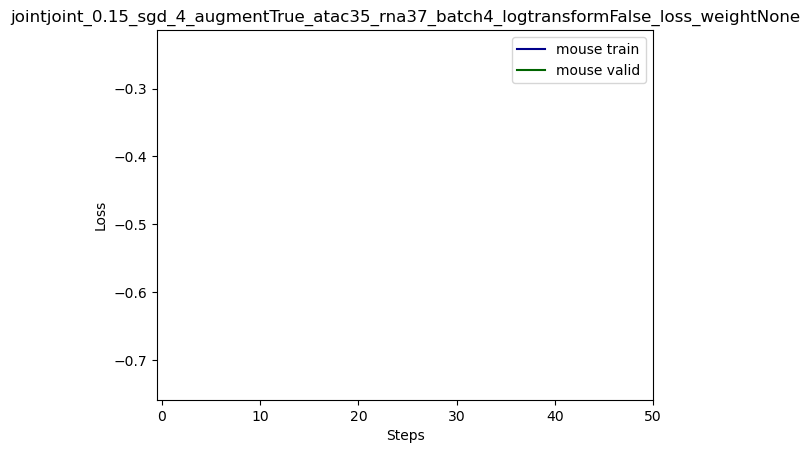

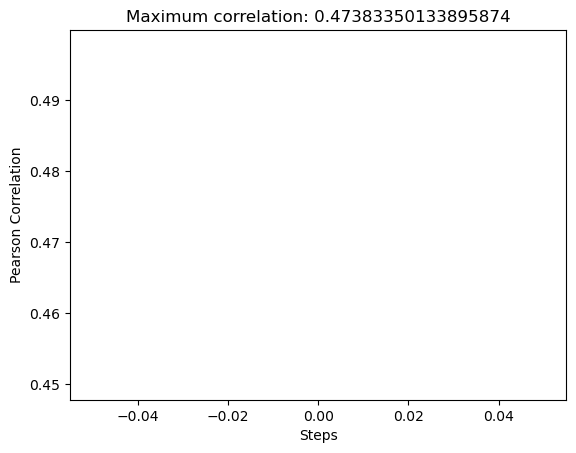

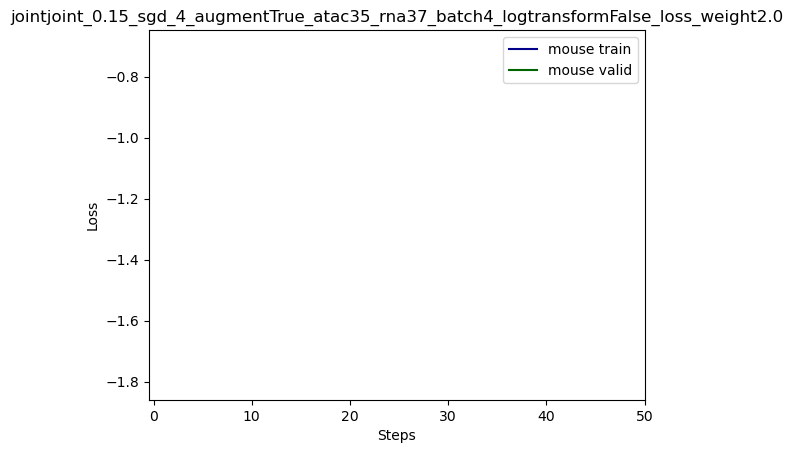

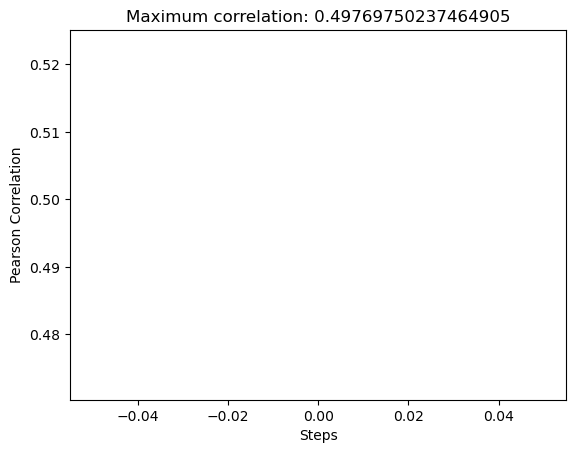

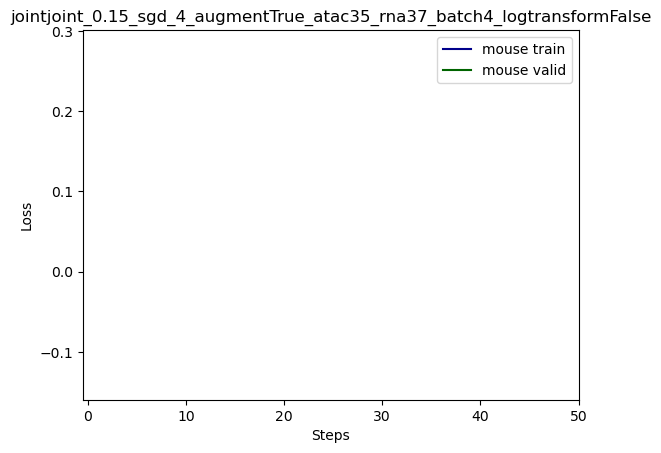

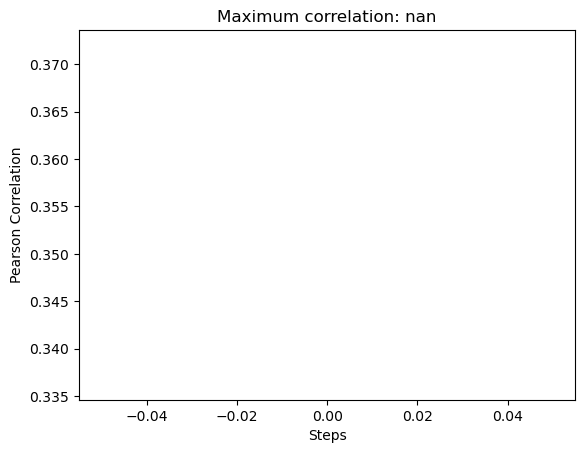

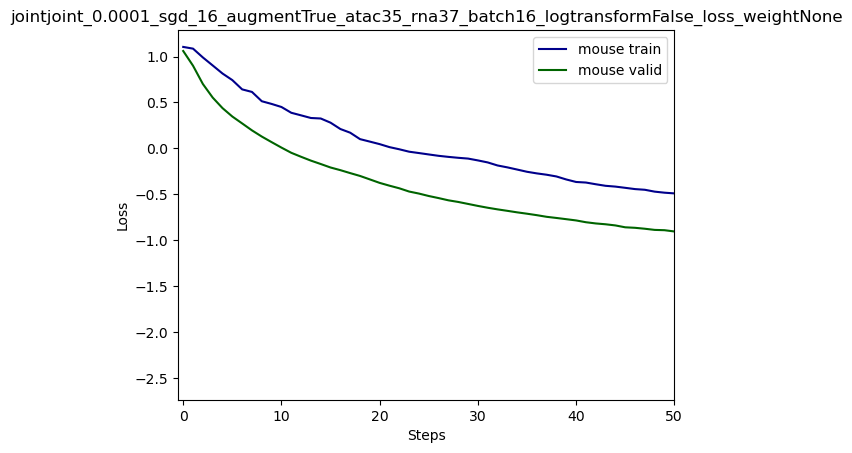

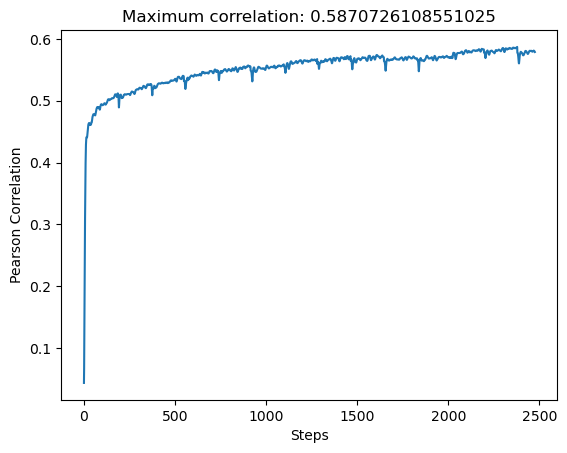

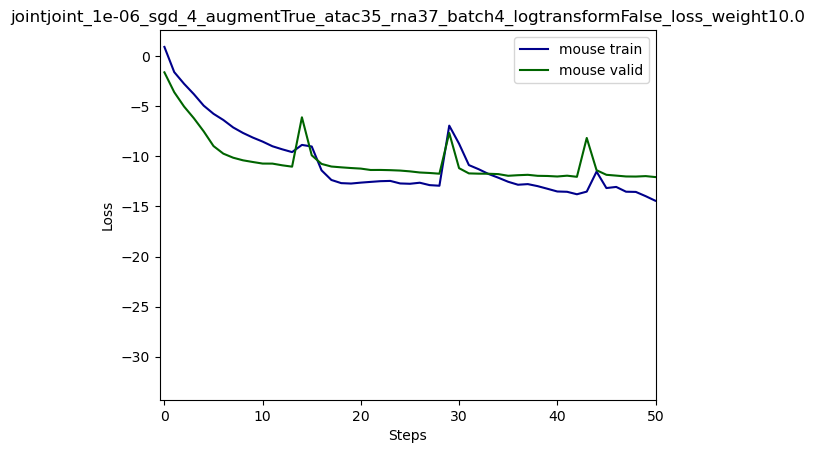

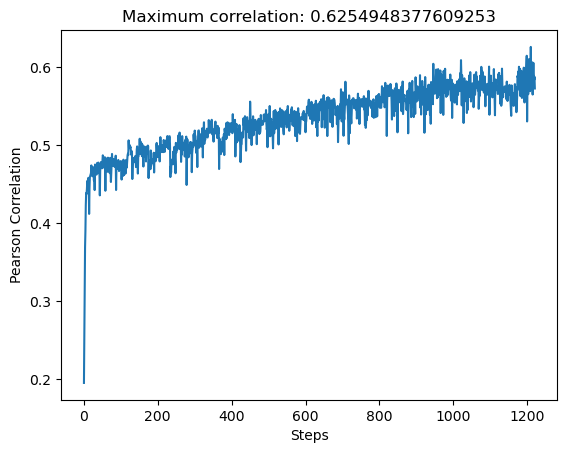

In [12]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/joint/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl") & file.startswith("joint"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"], xlim=[-0.5,50], save_pdf="/data/mikulik/mnt/gcs_basenj/plots/loss_curves/joint_finetune/")
    plot_correlation_curves(data_dir, name)

### Finetuning single cell type

In [8]:
with open(os.path.join(data_dir, file), "rb") as f:
    a = pickle.load(f)

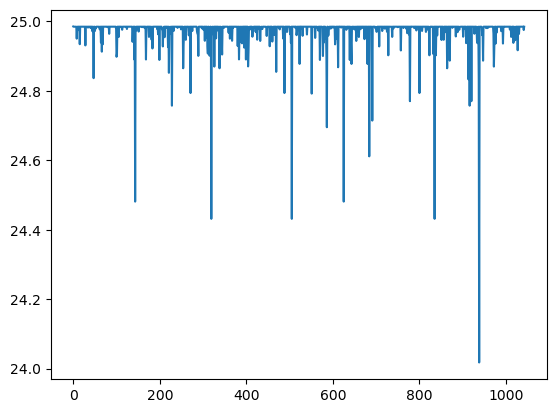

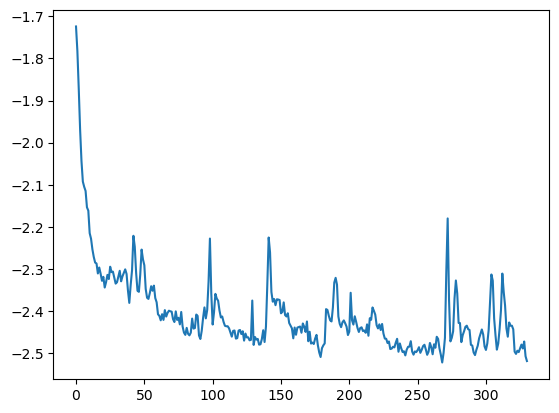

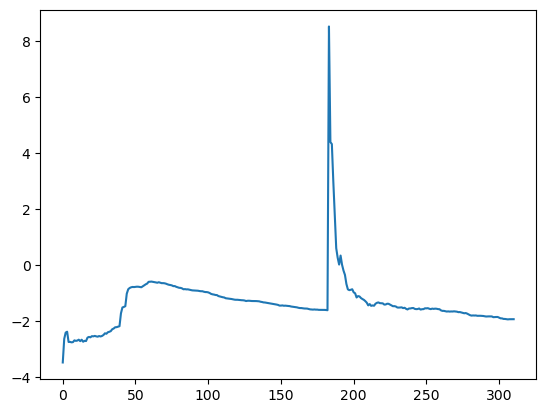

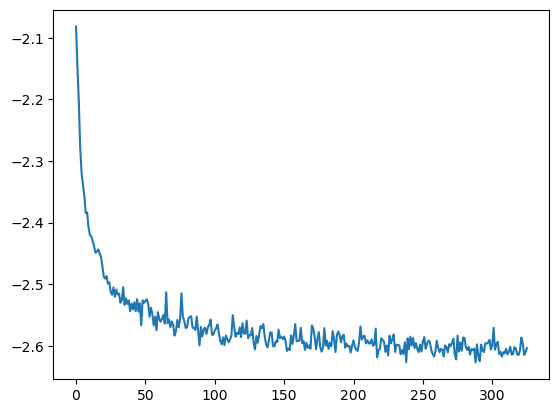

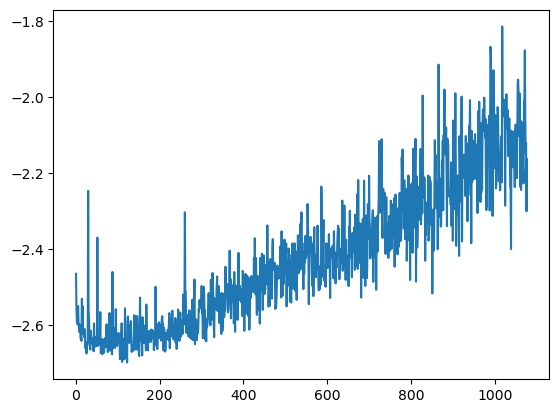

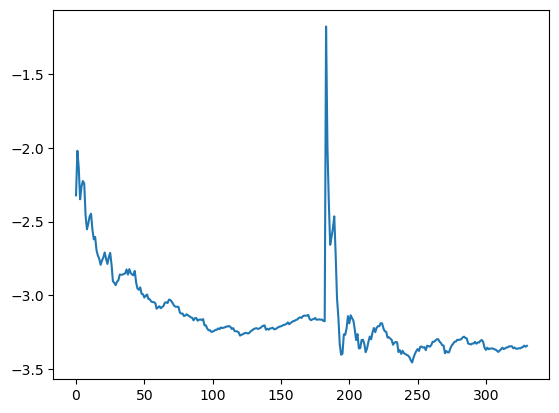

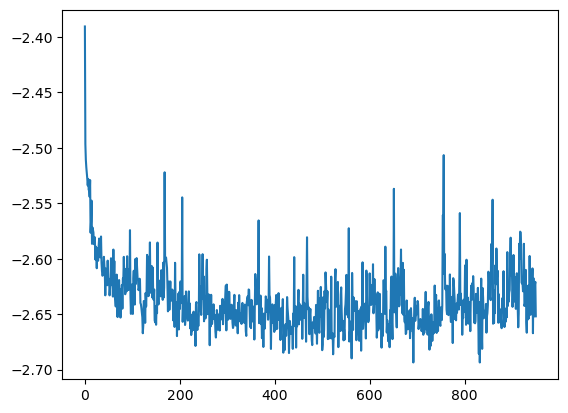

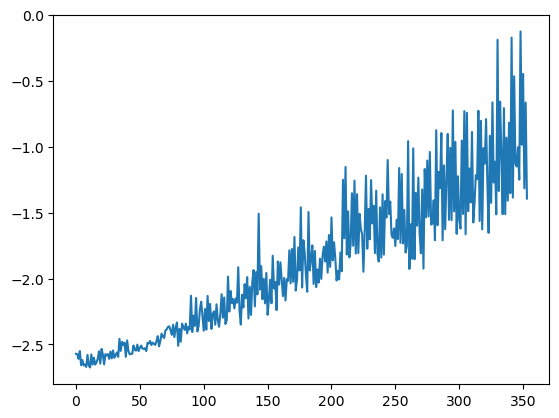

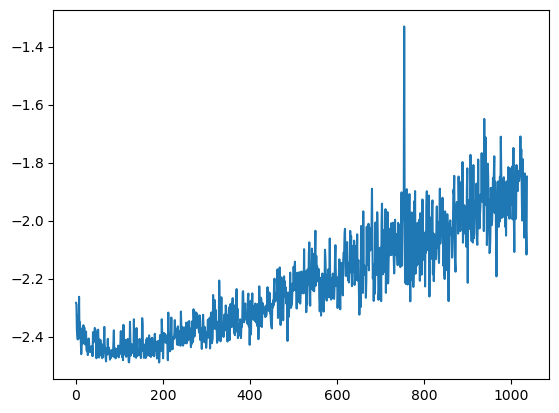

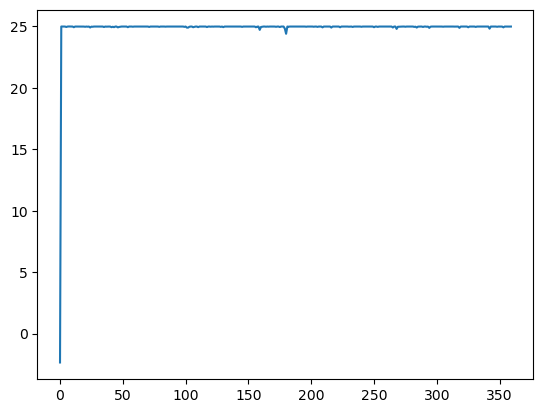

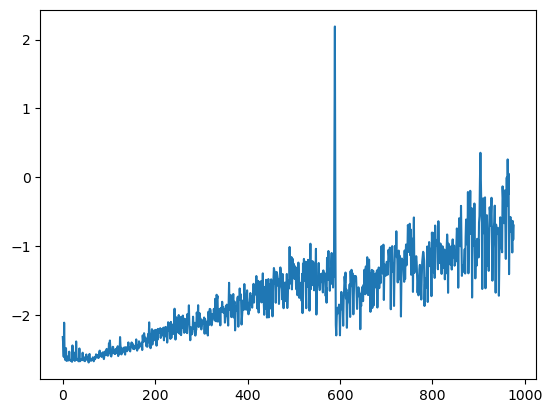

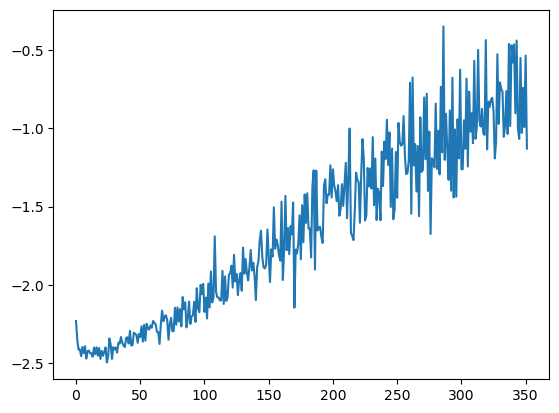

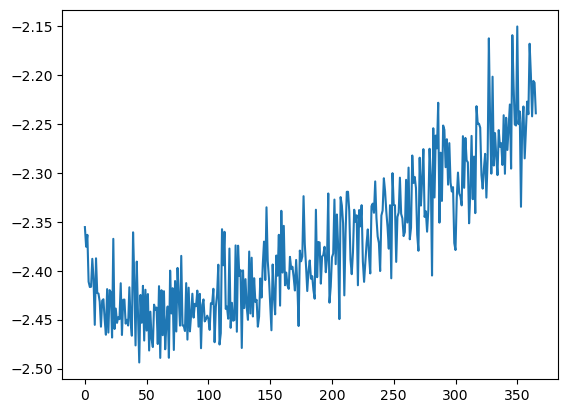

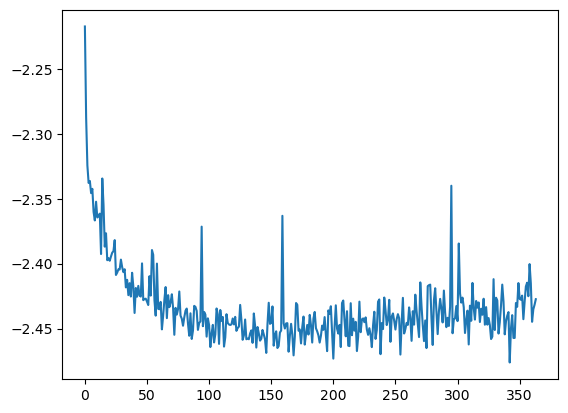

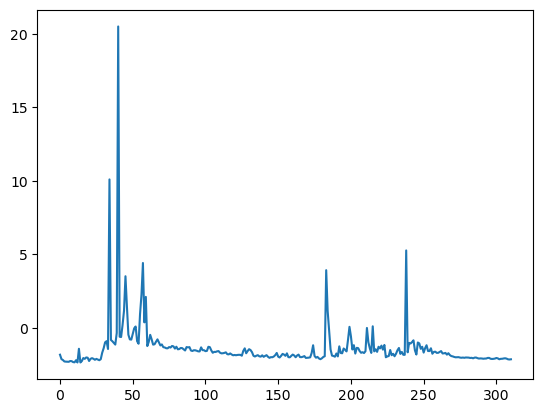

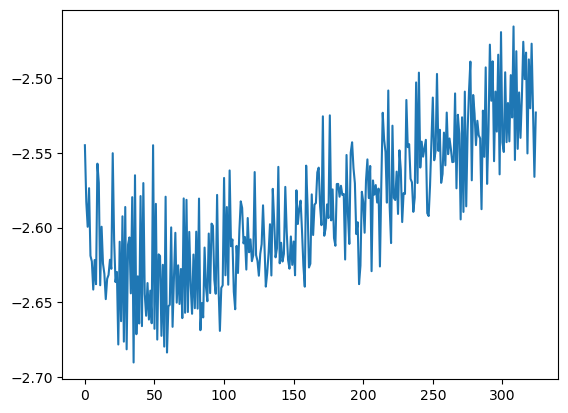

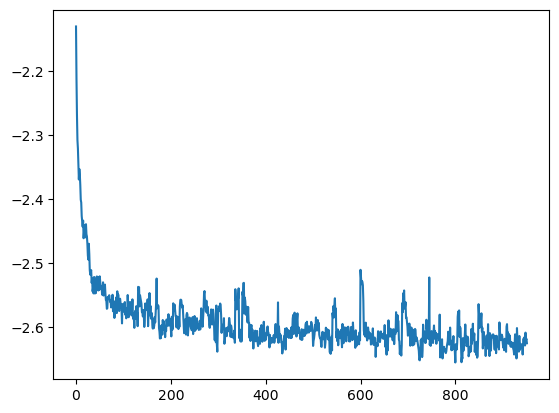

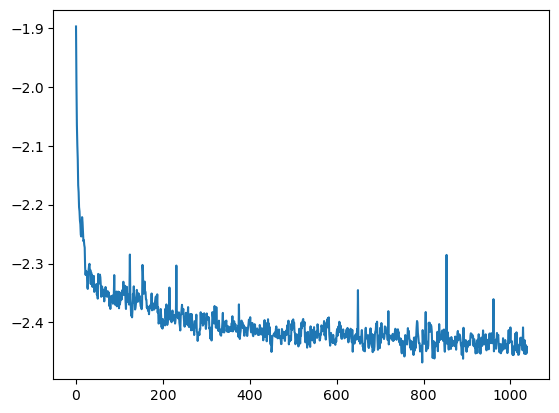

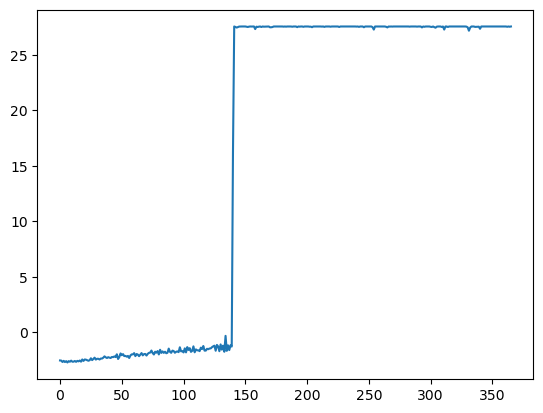

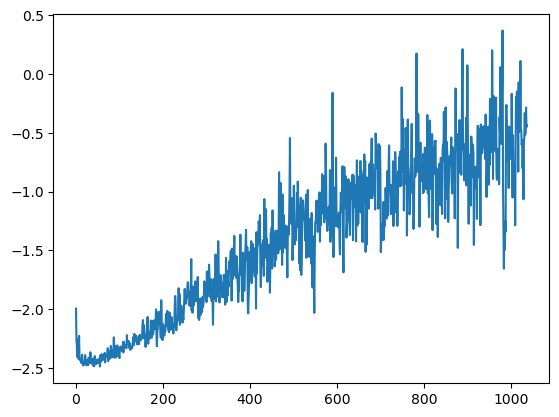

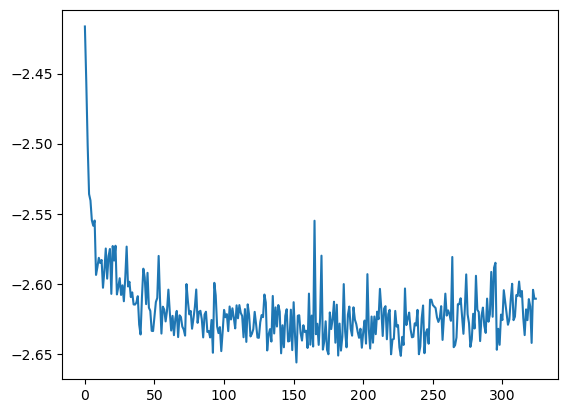

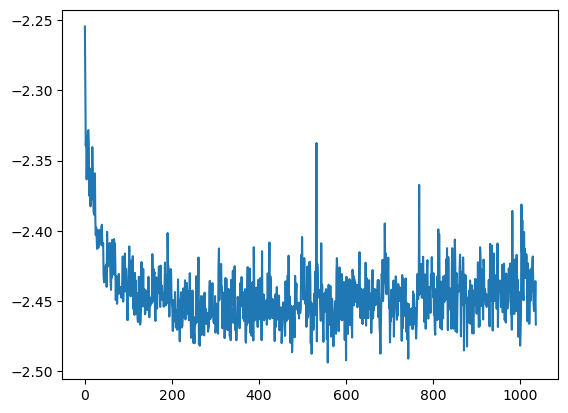

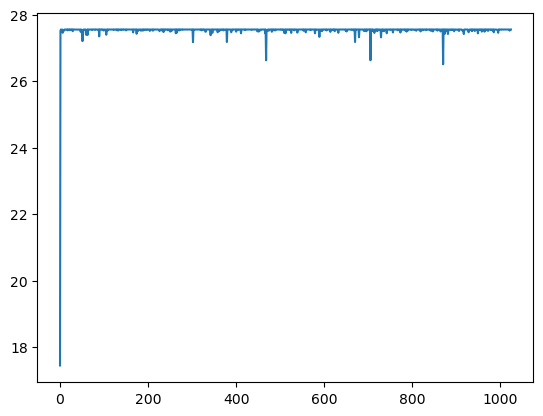

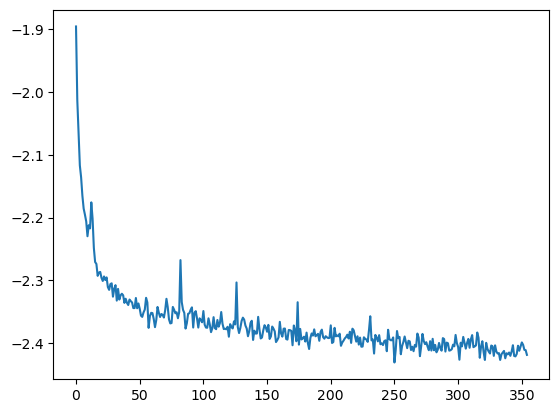

In [20]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/celltype/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith(".pkl") & ~file.endswith("checkpoint.pt") & ~file.endswith("correlations.pkl"):
        #name = file.rsplit("_test_loss.pkl")
        with open(os.path.join(data_dir, file), "rb") as f:
            loss = pickle.load(f)
        plt.plot(np.arange(len(loss["mouse"])), loss["mouse"])
        plt.show()

### Training Basenji on scratch from RNA

['rna_from_scratch_0.001_sgd_4_augmentTrue_log_transformFalse_rna37_atacNone', 'rna_from_scratch_0.0001_sgd_4_augmentTrue_log_transformFalse_rna37_atacNone']


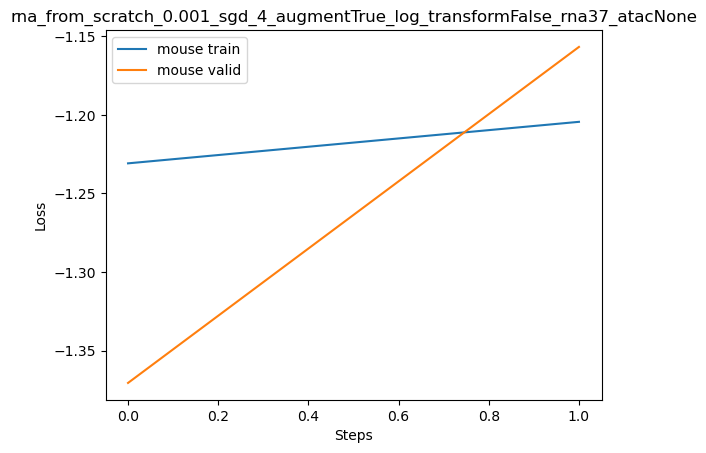

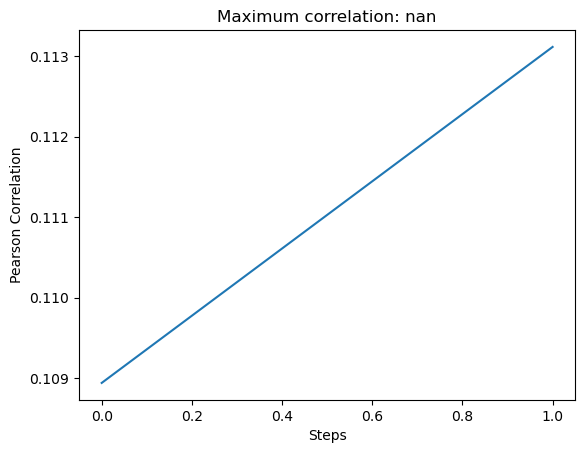

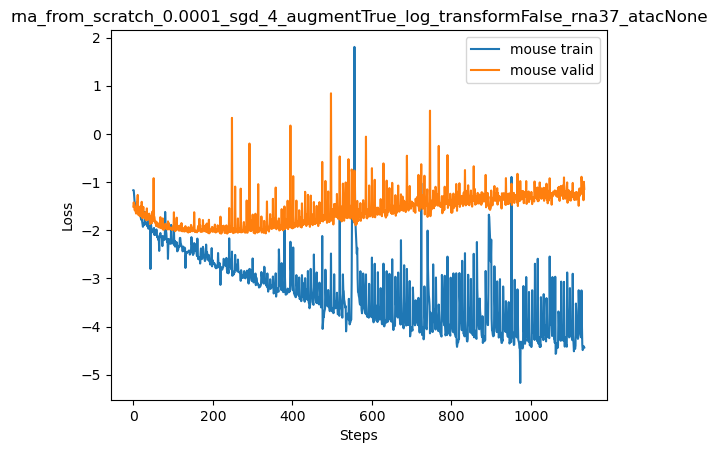

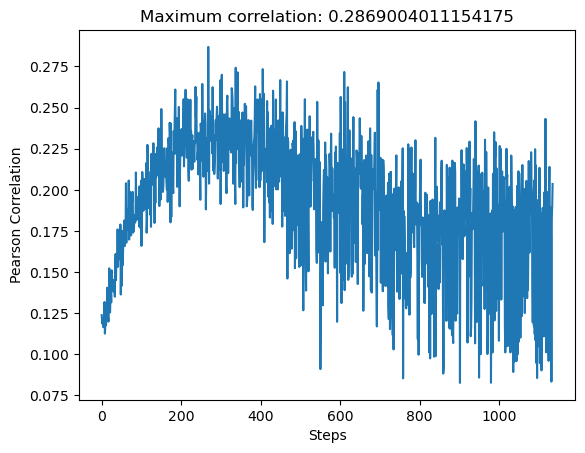

In [21]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/scratch/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"])
    plot_correlation_curves(data_dir, name)

### Finetune Basenji2 on mouse

In [ ]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/finetune_mouse/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"])
    plot_correlation_curves(data_dir, name)


['basenji_mouse_finetune_0.001_sgd_4_augmentTrue', 'basenji_mouse_finetune_0.01_sgd_4_augmentTrue', 'basenji_mouse_finetune_0.15_sgd_4_augmentTrue', 'basenji_mouse_finetune_0.0001_sgd_4_augmentTrue']


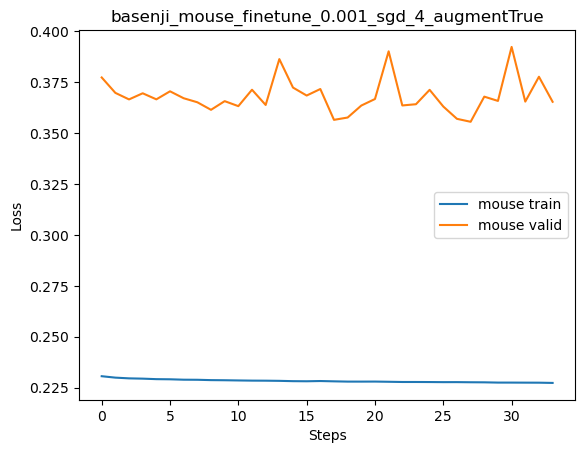

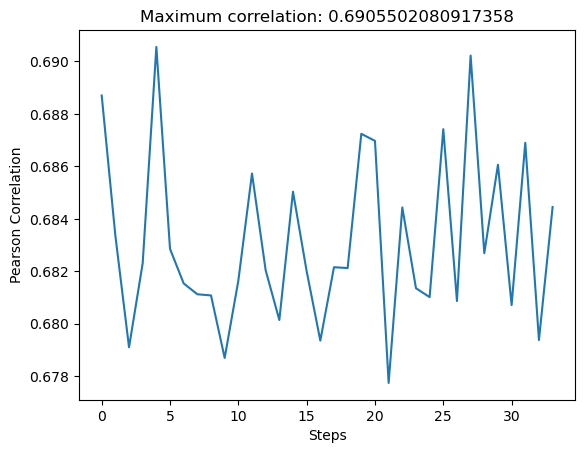

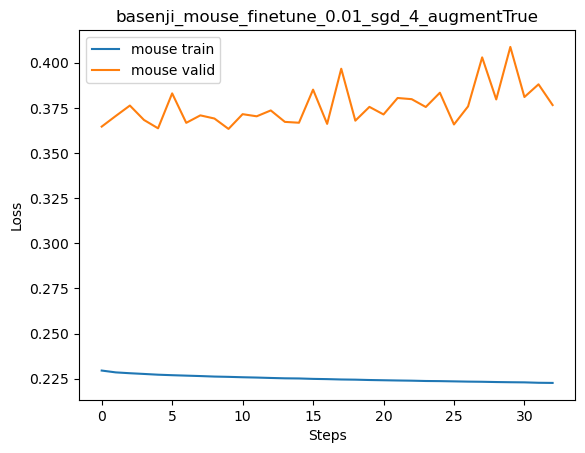

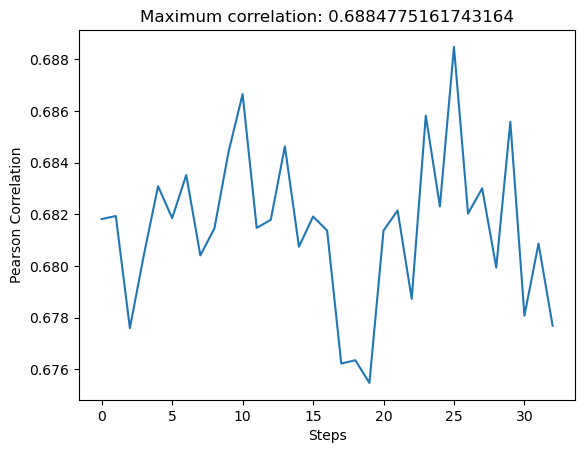

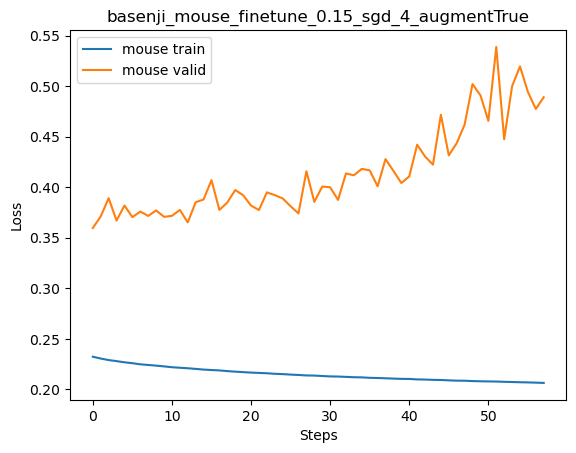

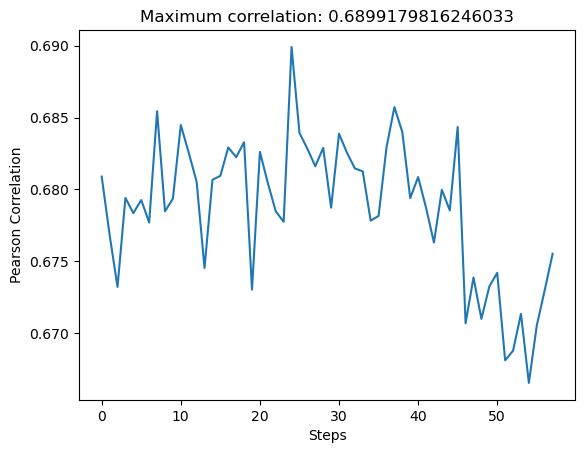

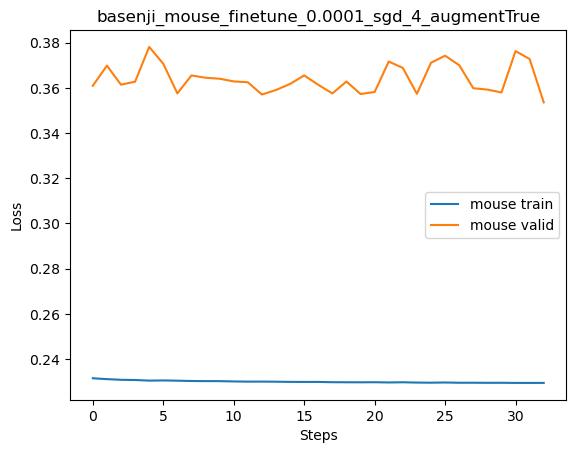

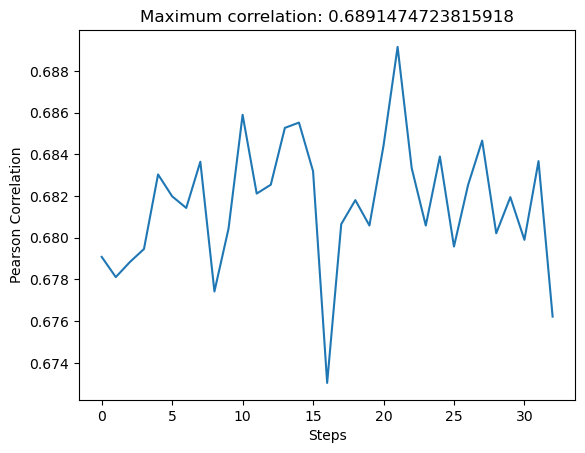

In [3]:
data_dir = "/data/mikulik/mnt/gcs_basenj/finetune_output/finetune_mouse/"
names = []
for file in os.listdir(data_dir): 
    if file.endswith("test_loss.pkl"):
        name = file.rsplit("_test_loss.pkl")
        names.append(name[0])
print(names)
for name in names: 
    plot_loss_curves_finetune(data_dir, name, species = ["mouse"])
    plot_correlation_curves(data_dir, name)
